### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle
from scipy.stats import pearsonr, linregress
from sklearn.linear_model import LinearRegression



### Import train data

In [2]:
Train_1 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-1')
Train_2 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-2')
Train_3 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-3')
Train_4 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-4')
Train_5 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-5')
Train_6 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-6')
Train_7 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-7')
Train_8 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-8')
Train_9 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-9')
Train_10 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-10')

In [3]:
#concatenate the data

Train = pd.concat([Train_1, Train_2, Train_3, Train_4, Train_5, Train_6, Train_7, Train_8, Train_9, Train_10], ignore_index=True)

### Import test data

In [4]:
#Import data

Test_1 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-1')
Test_2 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-2')
Test_3 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-3')
Test_4 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-4')
Test_5 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-5')

Test = pd.concat([Test_1, Test_2, Test_3, Test_4, Test_5], ignore_index=True)
test_datasets = [Test_1, Test_2, Test_3, Test_4, Test_5, Test] 

### Select best features

In [5]:
features=['x2', 'x6', 'x5', 'x8']

X=Train[features]
y=Train['BIS']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=1)
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
pickle.dump(scaler, open('scaler.pkl', 'wb'))

### Model Building for Linear Regression

In [6]:
regmodel = LinearRegression()
regmodel.fit(X_train, y_train)
y_pred = regmodel.predict(X_val)
pickle.dump(regmodel, open('regmodel.pkl', 'wb'))

In [7]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
train_score = regmodel.score(X_train, y_train)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Train score: ", train_score)

Mean Squared Error (MSE): 71.91383505638073
R-squared (R2): 0.751968693474352
Train score:  0.7501151648550843


### Create scatterplot of the result

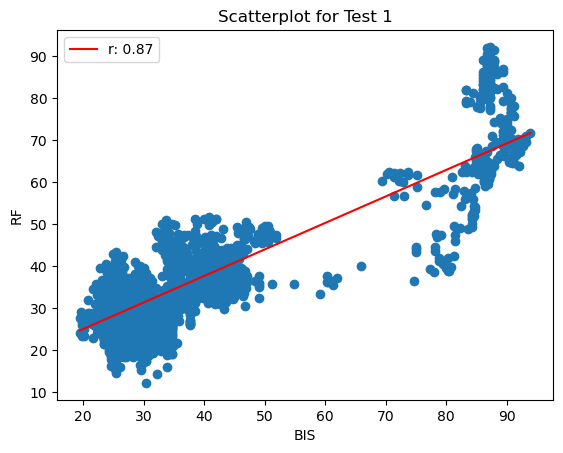

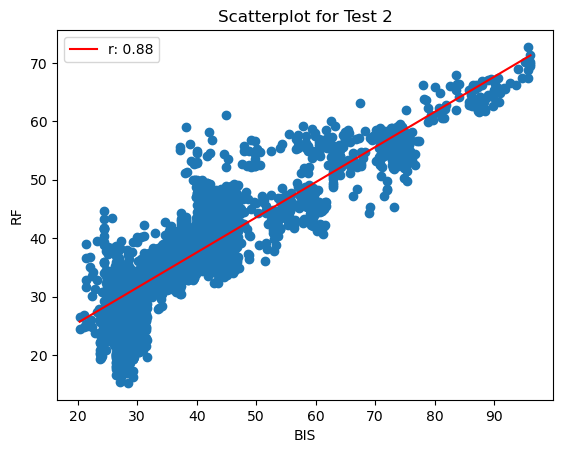

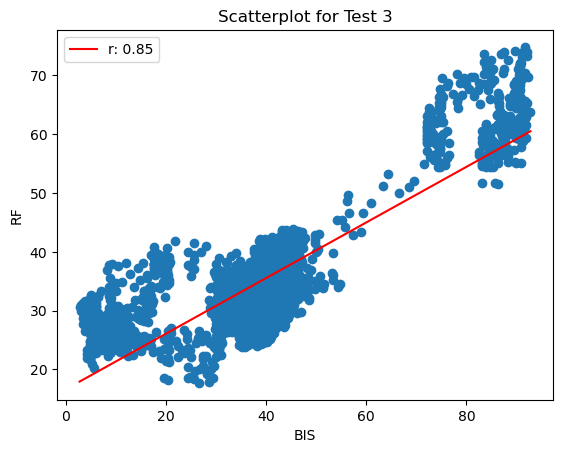

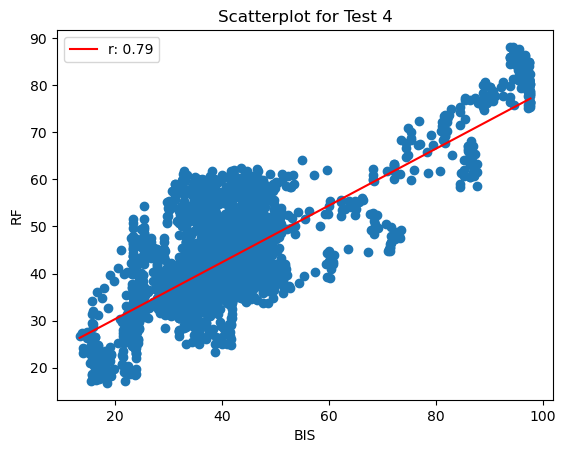

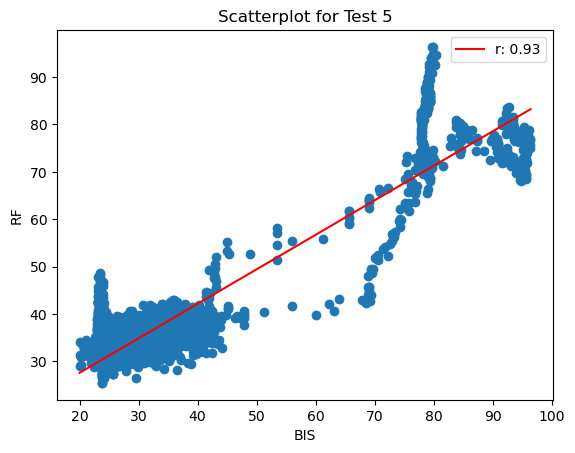

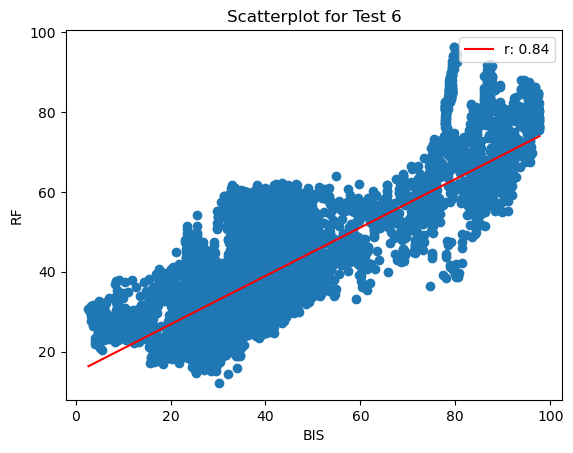

In [8]:
model=regmodel

for idx, test_data in enumerate (test_datasets):
    X_test = test_data[features]
    y_test = test_data['BIS']
    X_test=scaler.transform(X_test)
    y_pred = model.predict(X_test)
    slope, intercept, r_value, p_value, std_err = linregress(y_test, y_pred)
    x_range = np.array([y_test.min(), y_test.max()])
    plt.plot(x_range, slope * x_range + intercept, color='red', label=f'r: {round(r_value, 2)}')
    plt.scatter(y_test, y_pred)
    plt.xlabel('BIS')
    plt.ylabel('RF')
    plt.title(f'Scatterplot for Test {idx+1}' )
    plt.legend()
    plt.show()
    

### Create Bland-Altman plot

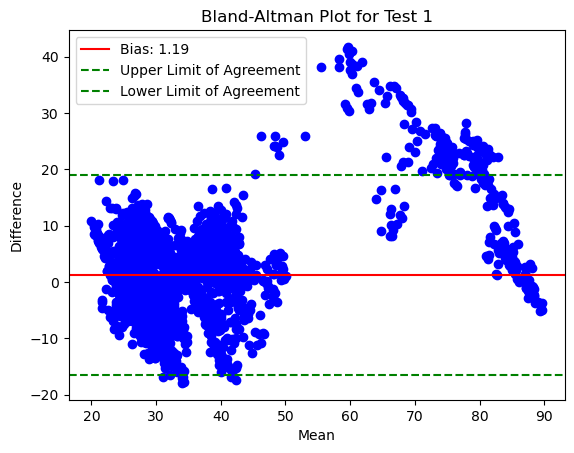

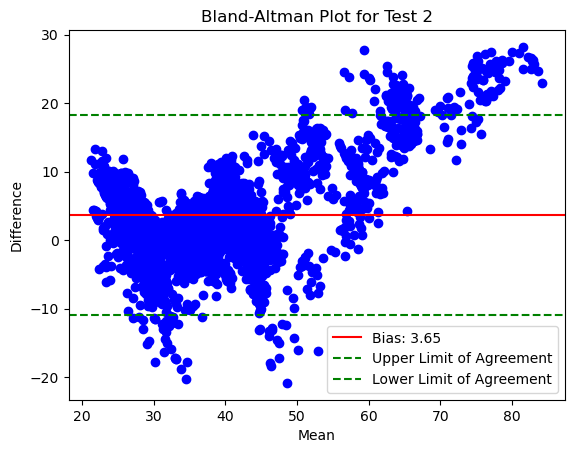

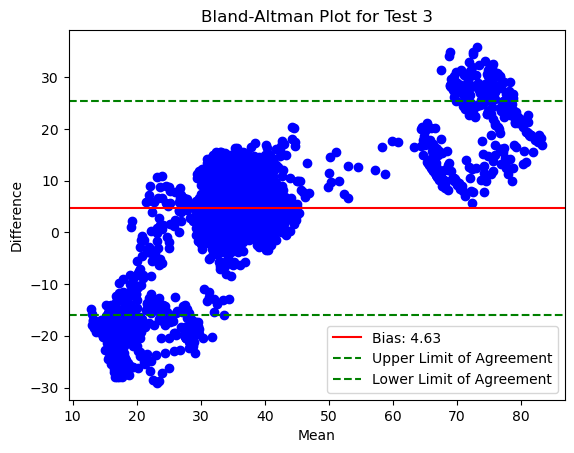

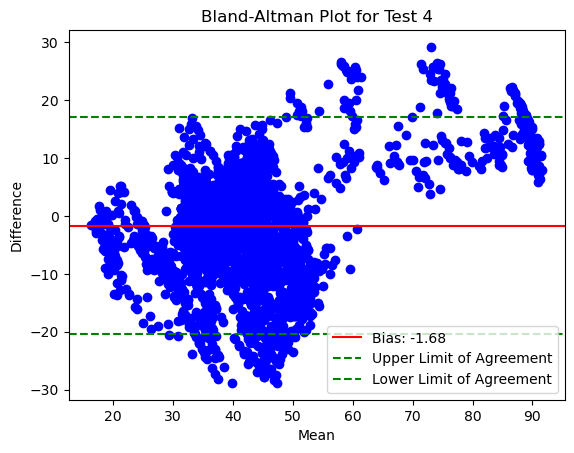

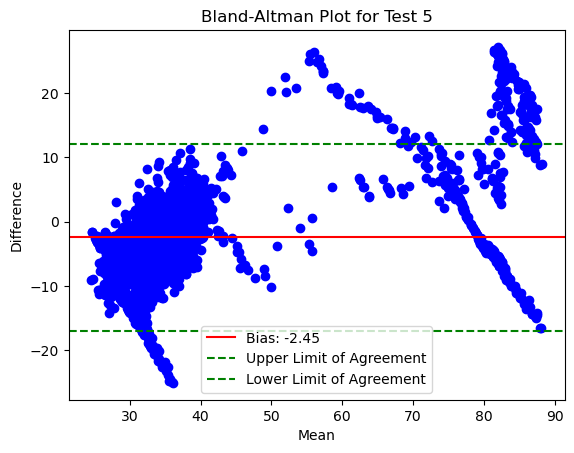

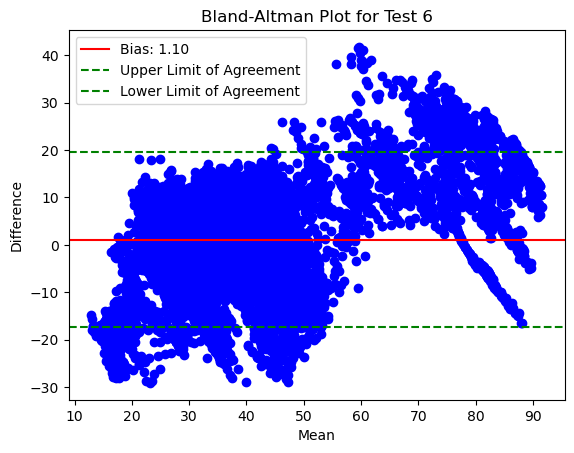

In [9]:
for index, test_data in enumerate (test_datasets):
    X_test = test_data[features]
    y_test = test_data['BIS']  
    X_test = scaler.transform(X_test)
    y_pred = model.predict(X_test)

    
    residuals = y_test - y_pred # Calculate residuals

    # The Bland-Altman Plot
    bias = np.mean(residuals)
    limits_of_agreement = 1.96 * np.std(residuals)

    plt.scatter((y_pred + y_test) / 2, residuals, color='blue')
    plt.axhline(bias, color='red', linestyle='-', label=f'Bias: {bias:.2f}')
    plt.axhline(bias + limits_of_agreement, color='green', linestyle='--', label='Upper Limit of Agreement')
    plt.axhline(bias - limits_of_agreement, color='green', linestyle='--', label='Lower Limit of Agreement')
    plt.xlabel('Mean')
    plt.ylabel('Difference')
    plt.title(f'Bland-Altman Plot for Test {index+1}')
    plt.legend()
    plt.show()


    


### Visualize the new index with BIS

Normalized New Index:
[33.36084478 36.98128806 34.00353217 30.94219524 32.06101496]


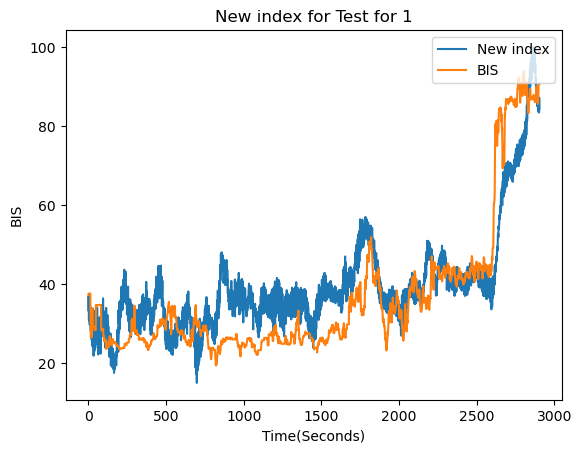

Normalized New Index:
[100.          95.52157674  96.28241671  97.88776077  95.70909635]


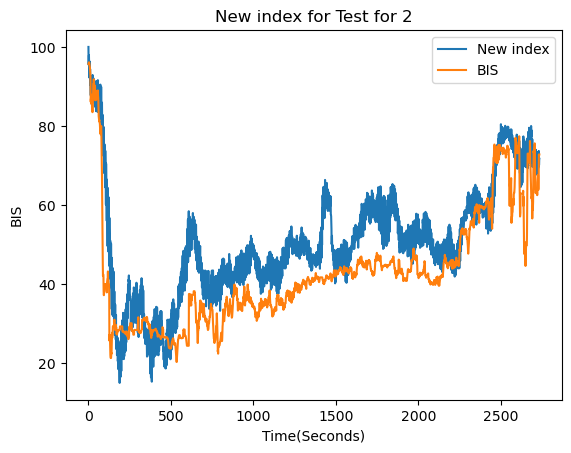

Normalized New Index:
[92.28074416 90.54802622 92.41749303 89.05268612 85.55400142]


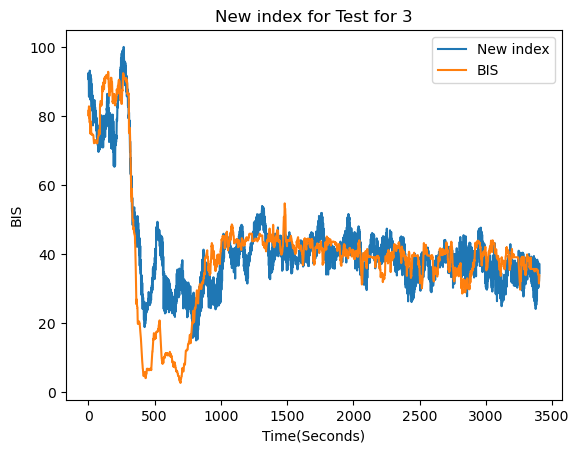

Normalized New Index:
[ 95.76174765  96.76825618 100.          98.78184127  99.27324033]


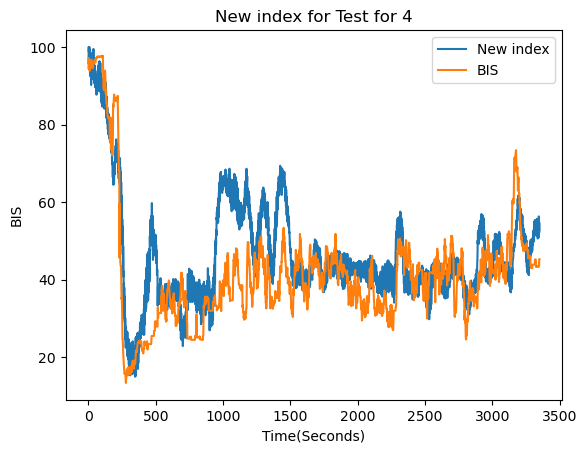

Normalized New Index:
[80.16003929 81.22497873 83.22177499 77.97210199 81.65975071]


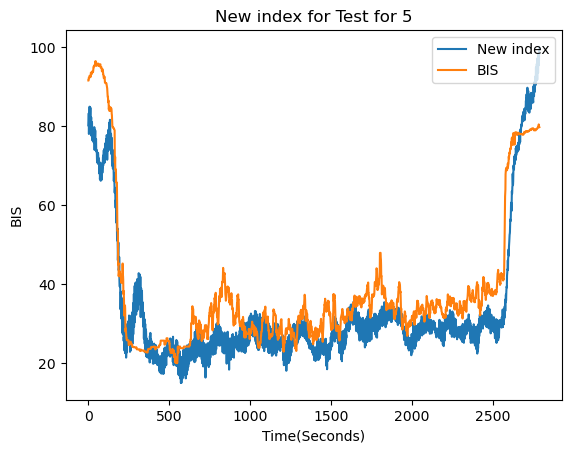

Normalized New Index:
[32.44252748 35.88189436 33.05307088 30.14484666 31.20770863]


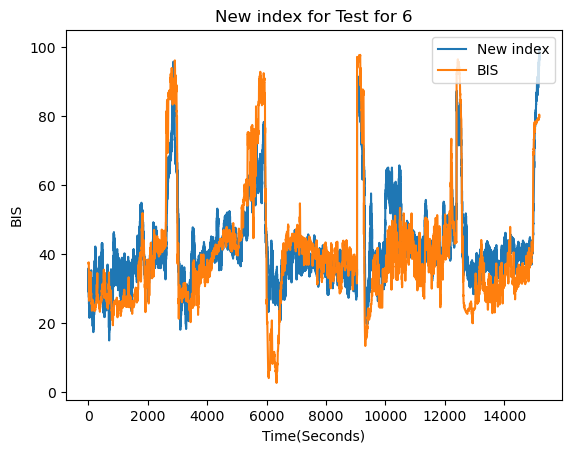

In [11]:

for index, test_data in enumerate (test_datasets):
    X_test = test_data[features]
    y_test = test_data['BIS']  
    X_test=scaler.transform(X_test)
    y_pred = regmodel.predict(X_test)

   
    scaled = MinMaxScaler(feature_range=(15, 100)) 
    new_index_norm = scaled.fit_transform(y_pred.reshape(-1, 1)).flatten()  # Normalize the new index

    
    print("Normalized New Index:")
    print(new_index_norm[:5]) #display first 5 data of the new index

    plt.plot(new_index_norm, label='New index')
    plt.plot(y_test,label ="BIS")
    plt.title(f"New index for Test for {index+1}")
    plt.ylabel('BIS')
    plt.xlabel('Time(Seconds)')
    plt.legend(loc="upper right")
    plt.show()
